# язык Python для анализа данных</a>

###Лекция №4

## Библиотека `matplotlib`

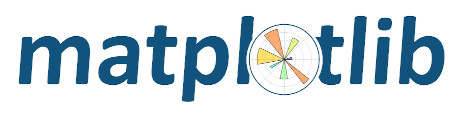

Есть несколько пакетов для построения графиков. Один из наиболее популярных — `matplotlib`. Если в `jupyter notebook` выполнить специальную магическую команду `%matplotlib inline`, то графики будут строиться в том же окне браузера. Есть другие варианты, в которых графики показываются в отдельных окнах. Это удобно для трёхмерных графиков — тогда их можно вертеть мышкой (в случае inline графиков это невозможно). Графики можно также сохранять в файлы, как в векторных форматах (`eps`, `pdf`, `svg`), так и в растровых (`png`, `jpg`). `matplotlib` позволяет строить двумерные графики практически всех нужных типов, с достаточно гибкой регулировкой их параметров; он также поддерживает основные типы трёхмерных графиков, но для серьёзной трёхмерной визуализации данных лучше пользоваться более мощными специализированными системами.

Некоторые функции отрисовки:
* `plt.scatter(x, y, params)` — нарисовать точки с координатами из $x$ по горизонтальной оси и из $y$ по вертикальной оси;
* `plt.plot(x, y, params)` — нарисовать график по точкам с координатами из $x$ по горизонтальной оси и из $y$ по вертикальной оси. Точки будут соединяться в том порядке, в котором они указаны в этих массивах;
* `plt.fill_between(x, y1, y2, params)` — закрасить пространство между $y_1$ и $y_2$ по координатам из $x$;
* `plt.pcolormesh(x1, x1, y, params)` — закрасить пространство в соответствии с интенсивностью $y$;
* `plt.contour(x1, x1, y, lines)` — нарисовать линии уровня. Затем нужно применить `plt.clabel`.


Вспомогательные функции:
* `plt.figure(figsize=(x, y))` — создать график размера $(x, y)$;
* `plt.show()` — показать график;
* `plt.subplot(...)` — добавить подграфик;
* `plt.xlim(x_min, x_max)` — установить пределы графика по горизонтальной оси;
* `plt.ylim(y_min, y_max)` — установить пределы графика по вертикальной оси;
* `plt.title(name)` — установить имя графика;
* `plt.xlabel(name)` — установить название горизонтальной оси;
* `plt.ylabel(name)` — установить название вертикальной оси;
* `plt.legend(loc=...)` — сделать легенду в позиции loc;
* `plt.grid()` — добавить сетку на график;
* `plt.savefig(filename)` — сохранить график в файл.

http://matplotlib.org/gallery.html — тысячи примеров.

У функций в `matplotlib` много параметров.
Для того чтобы посмотреть все параметры, можно воспользоваться справкой, например,

`plt.plot?`

### 1. Простые графики

In [ ]:
# подключим библиотеку matplotlib
import matplotlib.pyplot as plt  # plt - общепринятый псевдоним модуля, функции для построения диаграмм с помощью библиотеки содержатся в ее модуле pyplot
import numpy as np

import matplotlib  # подключим основной модуль, чтобы узнать версию
%matplotlib inline
matplotlib.__version__  # установленная в Colab версия библиотеки



'3.10.0'

1. Функция grid() включает отображение сетки.
Команда
`plt.rcParams["axes.axisbelow"] = True`
располагает сетку и оси координат за фигурами диаграмм, позади них (по умолчанию сетка их перекрывает).
2. Функции xticks(), yticks() позволяют вручную задать значения на осях координат 𝑥, 𝑦 соответственно.
3. Функции xlim(), ylim() устанавливают границы отображаемой области холста по 𝑥, 𝑦 (сам холст с диа-граммами может быть больших размеров, но отображаться будет лишь указанная его часть). Функции ylabel(), xlabel() задают подписи осей.
4. Функция title() задает заголовок всей диаграммы (композиции диаграмм) целиком.
5. Некоторые функции, устанавливающие параметры текстовых меток, имеют аргумент size для указания размера шрифта.
Функции, выполняющие построение диаграмм и задающие их параметры, возвращают специфические объекты, содержимое которых, если они сконструированы в последней строке ячейки Colab, выводится на экран в виде текстового представления объекта. Как правило, вывод этих данных является лишним. Хороший способ его подавить – добавление в конце последней строки ячейки точки с запятой (;). Также можно использовать функцию show(), отображающую холст со всеми диаграммами, которая ничего не возвращает и не создает лишнего вывода. В более традиционных средах разработки на Python, таких как PyCharm, в которых код программы содержится в модулях, а не в блокнотах, вызов show() необходим для отображения построенных диаграмм. Однако в Colab изображение выводится и без использования данной функции.
Рассмотрим построение диаграмм нескольких основных типов, применяемых в анализе данных. Как известно, данные могут быть количественные (например, заработная плата, рост человека или длина лепестка ириса) и качественные, или категориальные (марка автомобиля или цвет рубашки).

При построении диаграмм в Matplotlib они помещаются на холст (область, содержащую изображения), который создается автоматически при создании диа-граммы. Размерами холста можно управлять с помощью изменения значения *figure.figsize* в словаре параметров визуализации:
`plt.rcParams["figure.figsize"] = <ширина в дюймах>, <длина в дюймах>`

Количество пикселов, которому соответствует заданная длина или ширина, можно вычислить, умножив его на величину DPI (от англ. dots per inch – точек на дюйм), которая по умолчанию составляет 100.

На холст можно поместить несколько диаграмм. Для построения новой диаграммы вызывается соответствующая функция. Вызов нескольких таких функций подряд добавит на холст соответствующие диаграммы. Очередностью расположения диаграмм на холсте можно управлять при помощи аргумента функций построения zorder. Это позволяет, например, поместить график с маркерами точек поверх соединяющей эти точки ломаной, которая является графиком иного типа и конструируется с помощью другой функции.

Рисуем график с помощью списка $y$-координат; $x$-координаты образуют последовательность 0, 1, 2, ...

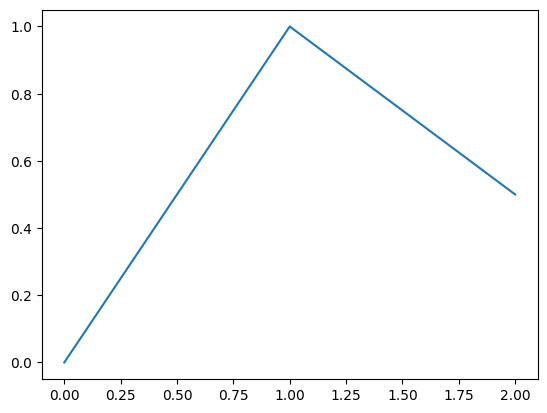

In [ ]:
plt.figure()
plt.plot([0, 1, 0.5])
plt.show()

Списки $x$ и $y$ координат точек. Точки соединяются прямыми, т.е. строится ломаная линия.

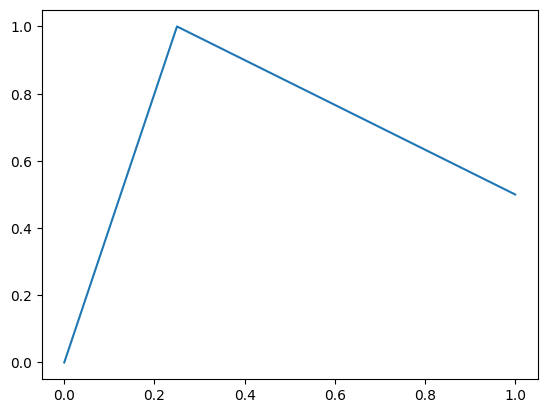

In [ ]:
plt.figure()
plt.plot([0, 0.25, 1], [0, 1, 0.5])
plt.show()

Функция `scatter` просто рисует точки, не соединяя их линиями.

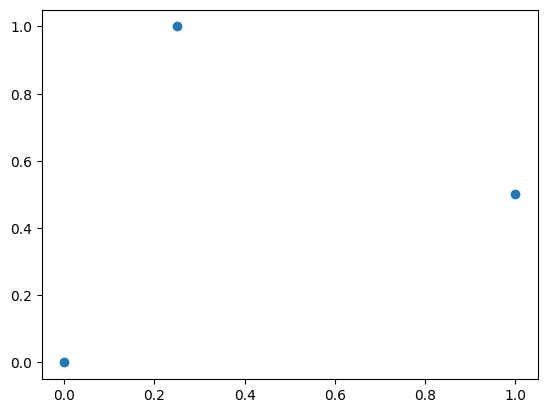

In [ ]:
plt.figure()
plt.scatter([0, 0.25, 1], [0, 1, 0.5])
plt.show()

$x$-координаты не обязаны монотонно возрастать. Тут, например, мы строим замкнутый многоугольник.

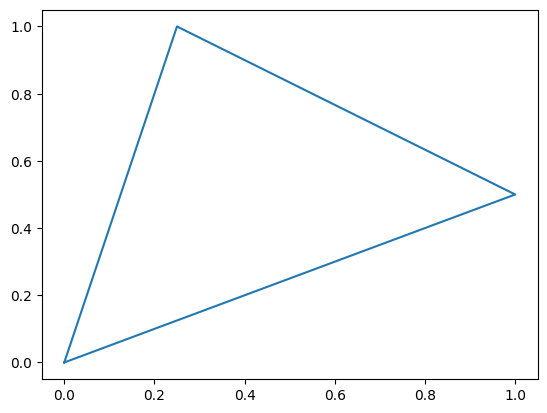

In [ ]:
plt.figure()
plt.plot([0, 0.25, 1, 0], [0, 1, 0.5, 0])
plt.show()

Когда точек много, ломаная неотличима от гладкой кривой.

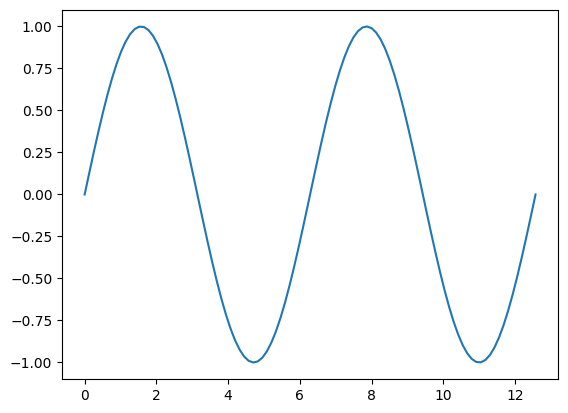

In [ ]:
x = np.linspace(0, 4 * np.pi, 100)

plt.figure()
plt.plot(x, np.sin(x))
plt.show()

Массив $x$ не обязан быть монотонно возрастающим. Можно строить любую параметрическую линию $x=x(t)$, $y=y(t)$.

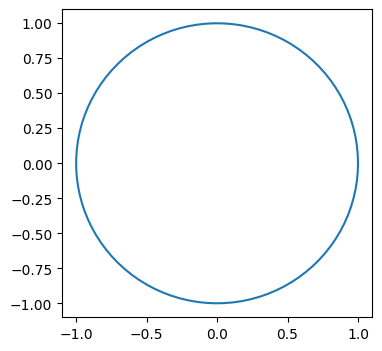

In [ ]:
t = np.linspace(0, 2 * np.pi, 100)

plt.figure(figsize=(4,4)) #
plt.plot(np.cos(t), np.sin(t))
plt.show()

А вот одна из фигур Лиссажу.

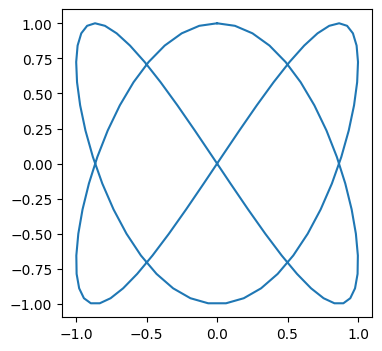

In [ ]:
plt.figure(figsize=(4,4))
plt.plot(np.sin(2 * t), np.cos(3 * t))
plt.show()

Несколько кривых на одном графике. Каждая задаётся парой массивов — $x$ и $y$ координаты. По умолчанию, им присваиваются цвета из некоторой последовательности цветов; разумеется, их можно изменить. Вообще говоря, подобным кодом не стоит пользоваться.

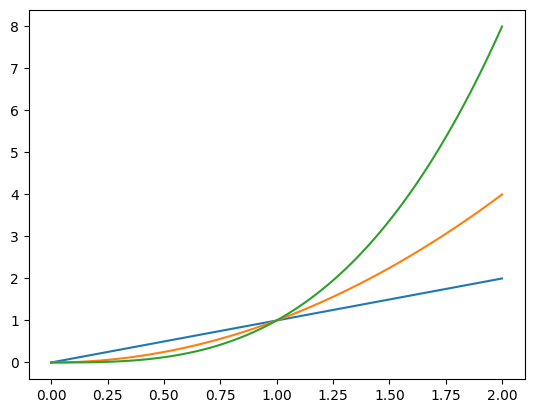

In [ ]:
x = np.linspace(0, 2, 100)

plt.figure()
plt.plot(x, x, x, x**2, x, x**3)
plt.show()

Для простой регулировки цветов и типов линий после пары $x$ и $y$ координат вставляется форматная строка. Первая буква определяет цвет (`'r'` — красный, `'b'` — синий и т.д.), дальше задаётся тип линии (`'-'` — сплошная, `'--'` — пунктирная, `'-.'` — штрих-пунктирная и т.д.).

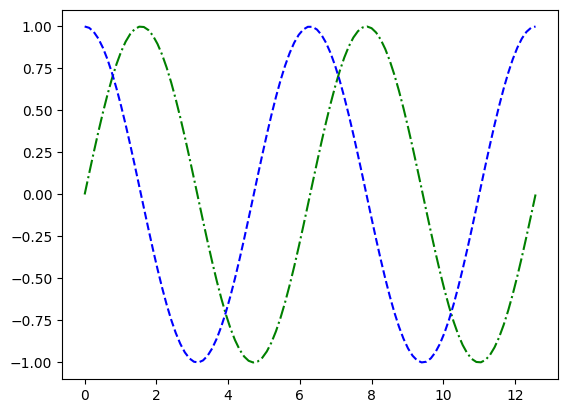

In [ ]:
x = np.linspace(0, 4 * np.pi, 100)

plt.figure()
plt.plot(x, np.sin(x), 'g-.')
plt.plot(x, np.cos(x), 'b--')
plt.show()

Если в качестве "типа линии" указано `'o'`, то это означает рисовать точки кружочками и не соединять их линиями; аналогично, `'s'` означает квадратики. Конечно, такие графики имеют смысл только тогда, когда точек не очень много.

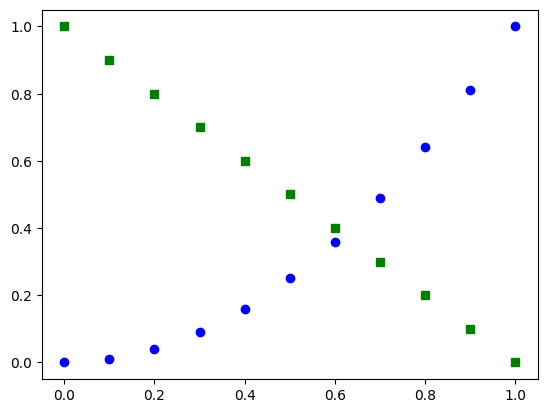

In [ ]:
x = np.linspace(0, 1, 11)

plt.figure()
plt.plot(x, x ** 2, 'bo')
plt.plot(x, 1 - x, 'gs')
plt.show()

Вот пример настройки почти всего, что можно настроить. Можно задать последовательность засечек на оси $x$ (и $y$) и подписи к ним, в которых, как и в других текстах, можно использовать $LaTeX$-овские обозначения. Задать подписи осей $x$ и $y$ и заголовок графика. Во всех текстовых элементах можно задать размер шрифта. Можно задать толщину линий и штрихи. В примере ниже на графике косинуса рисуется штрих длины 8, потом участок длины 4 не рисуется, потом участок длины 2 рисуется, потом участок длины 4 опять не рисуется, и так по циклу; поскольку толщина линии равна 2, эти короткие штрихи длины 2 фактически выглядят как точки. Можно задать подписи к кривым (legend); где разместить эти подписи тоже можно регулировать.

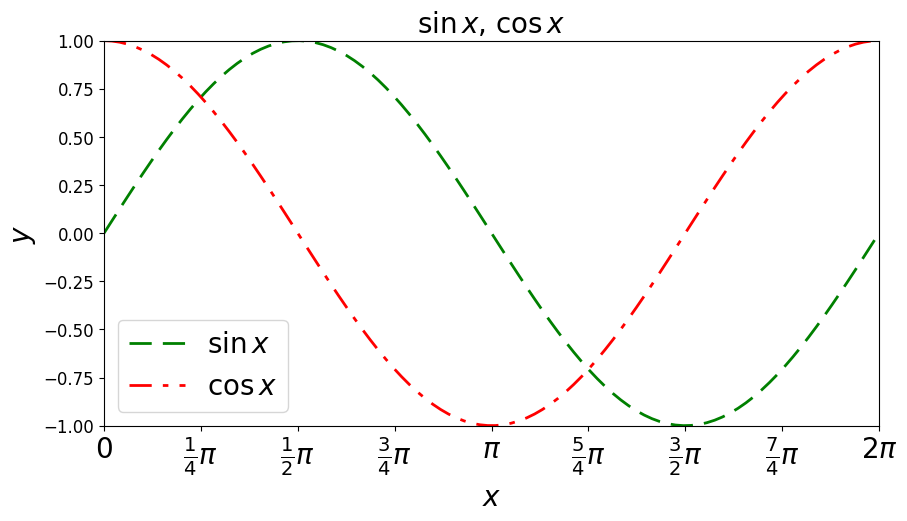

In [ ]:
x = np.linspace(0, 2 * np.pi, 100)

plt.figure(figsize=(10, 5))
plt.plot(x, np.sin(x), linewidth=2, color='g', dashes=[8, 4], label=r'$\sin x$')
plt.plot(x, np.cos(x), linewidth=2, color='r', dashes=[8, 4, 2, 4], label=r'$\cos x$')
plt.axis([0, 2 * np.pi, -1, 1])
plt.xticks(np.linspace(0, 2 * np.pi, 9),  # Где сделать отметки
           ('0',r'$\frac{1}{4}\pi$',r'$\frac{1}{2}\pi$',  # Как подписать
            r'$\frac{3}{4}\pi$',r'$\pi$',r'$\frac{5}{4}\pi$',
            r'$\frac{3}{2}\pi$',r'$\frac{7}{4}\pi$',r'$2\pi$'),
           fontsize=20)
plt.yticks(fontsize=12)
plt.xlabel(r'$x$', fontsize=20)
plt.ylabel(r'$y$', fontsize=20)
plt.title(r'$\sin x$, $\cos x$', fontsize=20)
plt.legend(fontsize=20, loc=0)
plt.show()

Строим пунктирный график функции $y = x^3$.

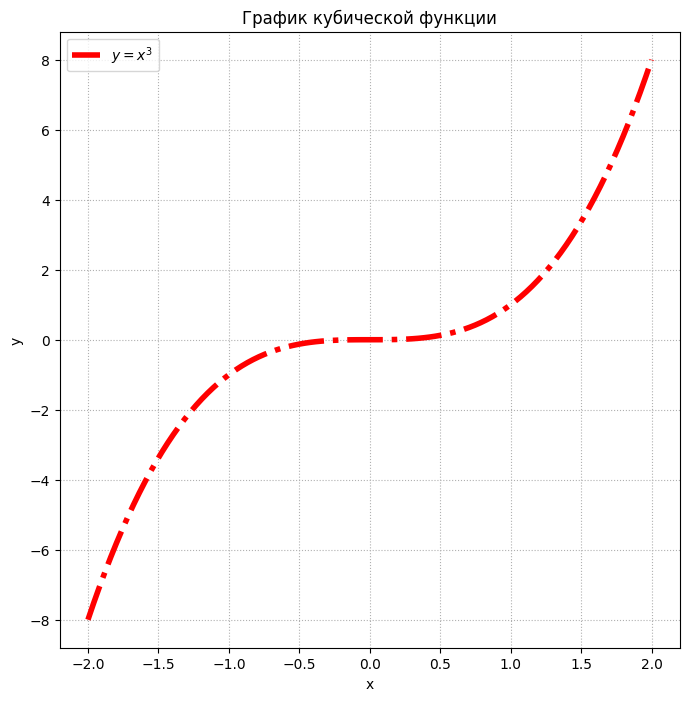

In [ ]:
x = np.linspace(-2, 2, 100)

plt.figure(figsize=(8, 8))
plt.plot(x, x**3, linestyle='-.',color='r', lw=4, label=r'$y=x^3$')
plt.xlabel('x'), plt.ylabel('y')
plt.legend()
plt.title('График кубической функции')
plt.grid(ls=':')
plt.show()

Если `linestyle=''`, то точки не соединяются линиями. Сами точки рисуются маркерами разных типов. Тип определяется строкой из одного символа, который чем-то похож на нужный маркер. Вдобавок к стандартным маркерам, можно определить самодельные.

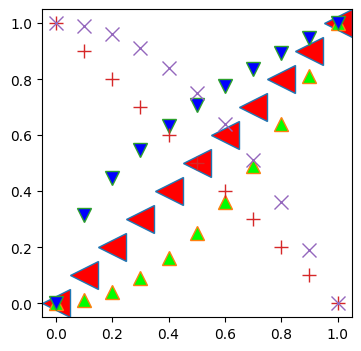

In [ ]:
x = np.linspace(0, 1, 11)

plt.figure(figsize=(4, 4))
plt.plot(x, x, linestyle='', marker='<', markersize=20, markerfacecolor='#FF0000')
plt.plot(x, x ** 2, linestyle='', marker='^', markersize=10, markerfacecolor='#00FF00')
plt.plot(x, x ** (1/2), linestyle='', marker='v', markersize=10, markerfacecolor='#0000FF')
plt.plot(x, 1 - x, linestyle='', marker='+', markersize=10, markerfacecolor='#0F0F00')
plt.plot(x, 1 - x ** 2, linestyle='', marker='x', markersize=10, markerfacecolor='#0F000F')
plt.axis([-0.05, 1.05, -0.05, 1.05])
plt.show()


Если $y$ меняется на много порядков, то удобно использовать логарифмический масштаб по $y$.

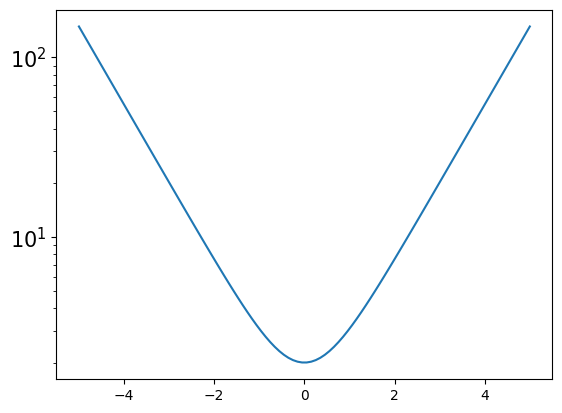

In [ ]:
x = np.linspace(-5, 5, 100)

plt.figure()
plt.plot(x, np.exp(x) + np.exp(-x))
plt.yscale('log')
plt.yticks(fontsize=15)
plt.show()

Можно задать логарифмический масштаб по обеим осям.

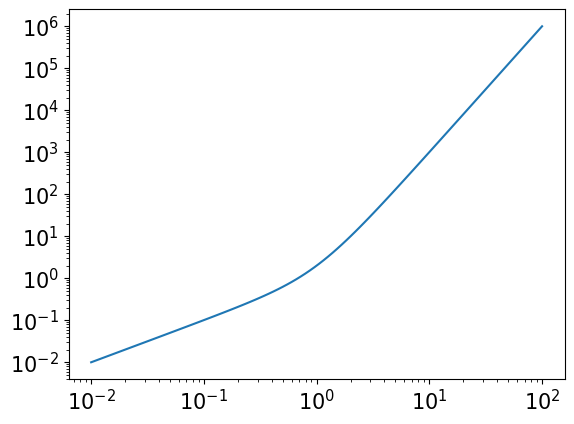

In [ ]:
x = np.logspace(-2, 2, 100)

plt.figure()
plt.plot(x, x + x ** 3)
plt.xscale('log'), plt.xticks(fontsize=15)
plt.yscale('log'), plt.yticks(fontsize=15)
plt.show()

### 2. Более сложные графики

#### 2.1. Полярные координаты

Первый массив — $\varphi$, второй — $r$. Вот спираль.

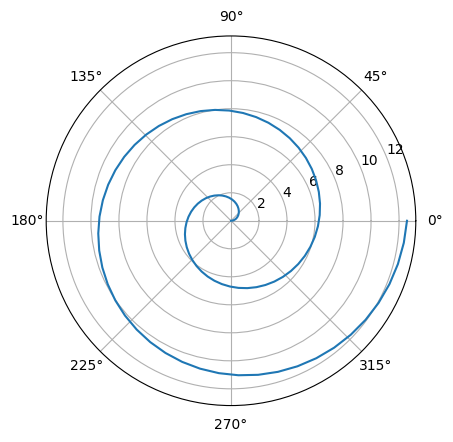

In [ ]:
t = np.linspace(0, 4 * np.pi, 100)

plt.figure()
plt.polar(t, t)
plt.show()

А это угловое распределение пионов в $e^+ e^-$ аннигиляции.

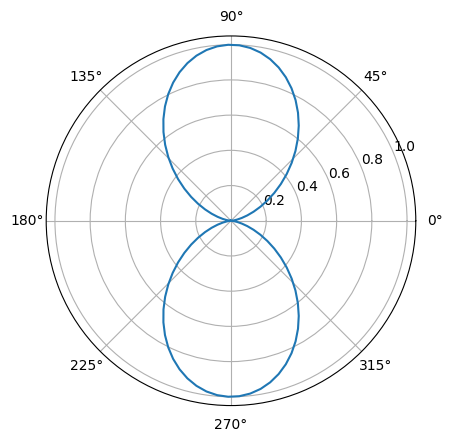

In [ ]:
phi = np.linspace(0, 2 * np.pi, 100)

plt.figure()
plt.polar(phi, np.sin(phi) ** 2)
plt.show()

#### 2.2. Контурные графики

Пусть мы хотим изучить поверхность $z=xy$. Вот её горизонтали.

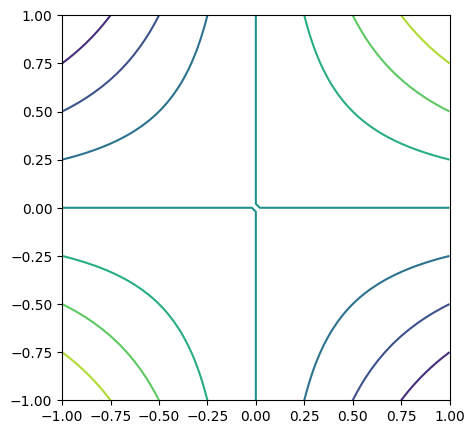

In [ ]:
x = np.linspace(-1, 1, 50)
y = x
z = np.outer(x, y)

plt.figure(figsize=(5,5))
plt.contour(x, y, z)
plt.show()

Что-то их маловато. Сделаем побольше и подпишем.

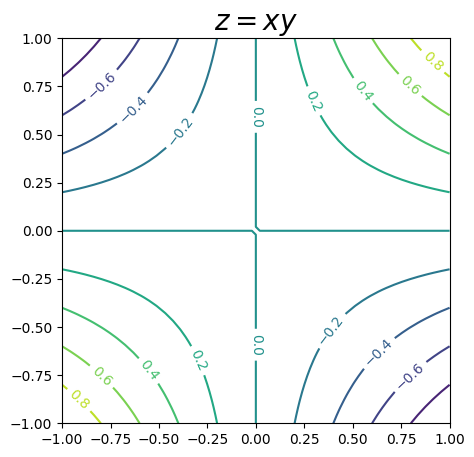

In [ ]:
plt.figure(figsize=(5,5))
curves = plt.contour(x, y, z, np.linspace(-1, 1, 11))
plt.clabel(curves)
plt.title(r'$z=xy$', fontsize=20)
plt.show()

А здесь высота даётся цветом, как на физических географических картах. Функция `colorbar` показывает соответствие цветов и значений $z$.

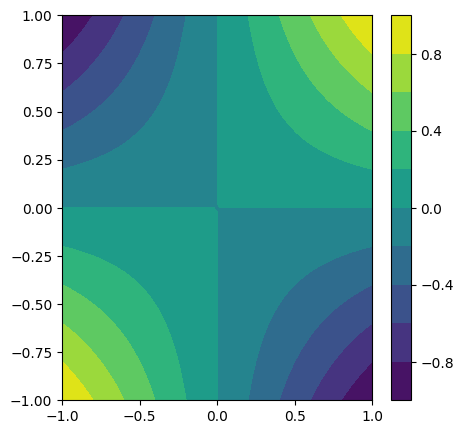

In [ ]:
plt.figure(figsize=(5,5))
plt.contourf(x, y, z, np.linspace(-1, 1, 11))
plt.colorbar()
plt.show()

#### 2.3.  Трёхмерная линия

Задаётся параметрически: $x=x(t)$, $y=y(t)$, $z=z(t)$.

In [ ]:
t = np.linspace(0, 4 * np.pi, 100)
x = np.cos(t)
y = np.sin(t)
z = t / (4 * np.pi)

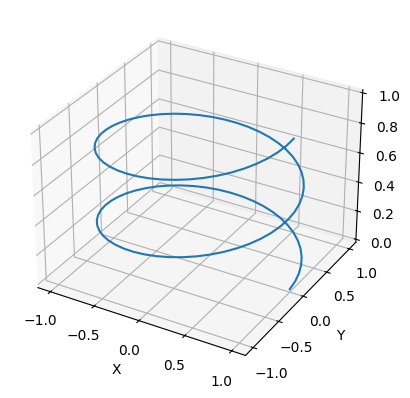

In [ ]:

# Создание 3D-осей
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Построение графика
ax.plot(x, y, z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

К сожалению, inline трёхмерную картинку нельзя вертеть мышкой. Это можно делать с трёхмерными картинками в отдельных окнах. Но можно задать, с какой стороны мы смотрим.

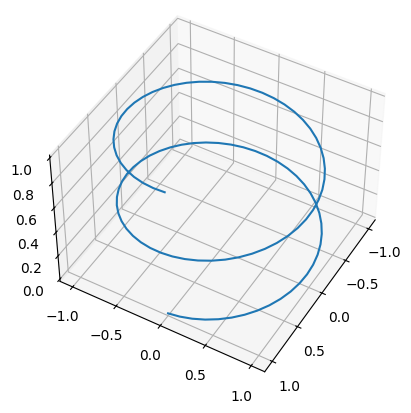

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.elev, ax.azim = 45, 30
ax.plot(x, y, z)
plt.show()

#### 2.4.  Поверхности

Все поверхности параметрические: $x=x(u,v)$, $y=y(u,v)$, $z=z(u,v)$. Если мы хотим построить явную поверхность $z=z(x,y)$, то удобно создать массивы $x=u$ и $y=v$ функцией `meshgrid`.

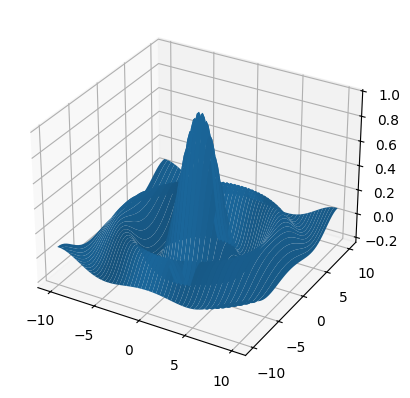

In [ ]:
X = 10
N = 50
u = np.linspace(-X, X, N)
x, y = np.meshgrid(u, u)
r = np.sqrt(x ** 2 + y ** 2)
z = np.sin(r) / r

fig = plt.figure()
ax=fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, rstride=100, cstride=1)
plt.show()

Есть много встроенных способов раскраски поверхностей. Так, в методе `gnuplot` цвет зависит от высоты $z$.

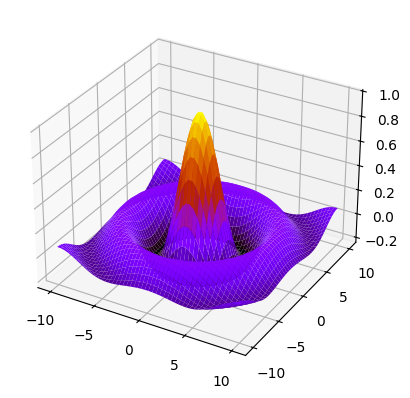

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='gnuplot')
plt.show()

Построим бублик — параметрическую поверхность с параметрами $\theta$, $\varphi$.

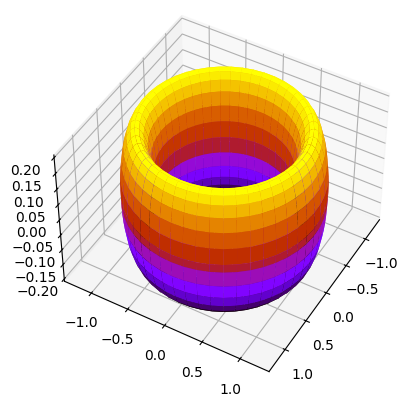

In [ ]:
t = np.linspace(0, 2 * np.pi, 50)
th, ph = np.meshgrid(t, t)
r = 0.2
x, y, z = (1 + r * np.cos(ph)) * np.cos(th), (1 + r * np.cos(ph)) * np.sin(th), r * np.sin(ph)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.elev, ax.azim = 45, 30
ax.plot_surface(x, y, z, rstride=2, cstride=1, cmap='gnuplot')
plt.show()

#### 2.5.  Анализ зависимостей



In [ ]:
import pandas as pd  # подключим pandas

backpacks_df = pd.DataFrame(
  {
    # веса студентов
    "student_weight": [40, 46, 50, 53, 57, 60, 65, 70, 71, 76],
    # веса рюкзаков
    "backpack_weight": [3.8, 6, 5.1, 7, 14, 8.9, 8.1, 9.9, 3.5, 12.5]
  },
  index=["Анна", "Алена", "Ксения", "Ольга", "Sharon",  # имена студентов
         "Антон", "Петр", "John", "Brad", "Сергей"]
)
backpacks_df.head(3)

,student_weight,backpack_weight
Анна,40,3.8
Алена,46,6.0
Ксения,50,5.1


Диаграмма разброса нужна для выявления зависимости между двумя типами данных. Она позволяет определить корреляцию между каким-либо параметром качества и влияющим на него фактором.

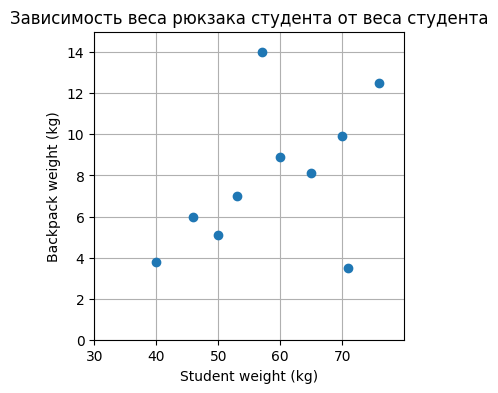

In [ ]:
plt.rcParams["figure.figsize"] = 4, 4  # установим размеры холста

# добавим на холст диаграмму рассеяния
plt.scatter(
  x=backpacks_df.student_weight,  # веса студентов
  y=backpacks_df.backpack_weight,  # веса рюкзаков
)

# установим положение осей и сетки позади фигур диаграмм (если с первого раза
plt.rcParams["axes.axisbelow"] = True  # не сработало, выполните код повторно)
plt.grid()  # включим отображение сетки

plt.xticks(range(30, 80, 10))  # зададим значения на оси x
plt.yticks(range(0, 15, 2))  # зададим значения на оси y

plt.xlim(30, 80)  # ограничим диапазон оси x
plt.ylim(0, 15)  # ограничим диапазон оси y

plt.xlabel("Student weight (kg)")  # установим подпись оси x
plt.ylabel("Backpack weight (kg)")  # установим подпись оси y

# добавим название всей диаграммы и не забудем подавить вывод объекта (;)
plt.title("Зависимость веса рюкзака студента от веса студента");

Добавим цвета.

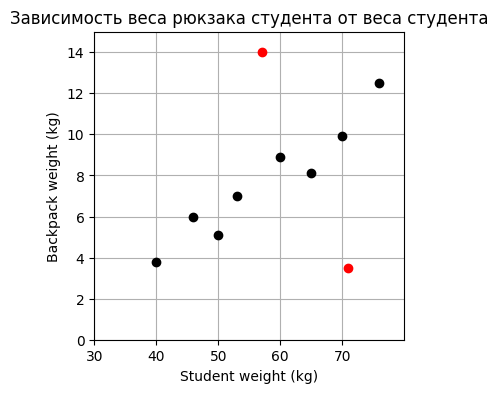

In [ ]:
# сформируем битовую карту объектов-выбросов
# (строковый индекс поддерживает строковые методы)
outliers = backpacks_df.index.str.contains("Sharon|Brad")

# обычные точки
plt.scatter(
  x=backpacks_df[~outliers].student_weight,
  y=backpacks_df[~outliers].backpack_weight,
  color="black"  # цвет черный
)

# точки-выбросы
plt.scatter(
  x=backpacks_df[outliers].student_weight,
  y=backpacks_df[outliers].backpack_weight,
  color="red"  # цвет красный
)

# остальной код ячейки не изменился
plt.rcParams["axes.axisbelow"] = True
plt.grid()
plt.xticks(range(30, 80, 10))
plt.yticks(range(0, 15, 2))
plt.xlim(30, 80)
plt.ylim(0, 15)
plt.xlabel("Student weight (kg)")
plt.ylabel("Backpack weight (kg)")
plt.title("Зависимость веса рюкзака студента от веса студента");

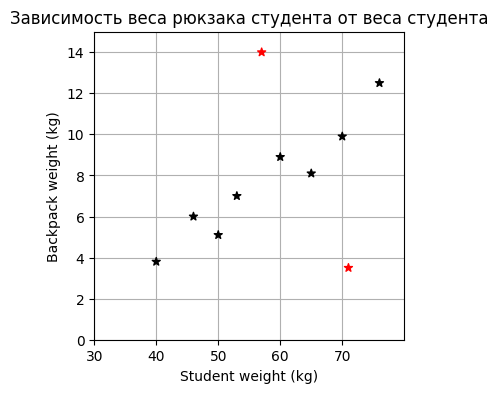

In [ ]:
plt.scatter(
  x=backpacks_df.student_weight,
  y=backpacks_df.backpack_weight,
  marker="*",  # точка в виде звездочки
  # в битовой карте выбросы обозначены True. Заменим True/False
  # на названия цветов, но так как метода replace() у numpy-массива нет,
  # преобразуем массив в ряд
  c=pd.Series(outliers).replace({False: "black", True: "red"})

)

# остальной код ячейки не изменился
plt.rcParams["axes.axisbelow"] = True
plt.grid()
plt.xticks(range(30, 80, 10))
plt.yticks(range(0, 15, 2))
plt.xlim(30, 80)
plt.ylim(0, 15)
plt.xlabel("Student weight (kg)")
plt.ylabel("Backpack weight (kg)")
plt.title("Зависимость веса рюкзака студента от веса студента");

In [ ]:
# загрузка датафрейма iris_df

iris_df = pd.read_csv( '/content/iris.csv', sep=",")

iris_df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


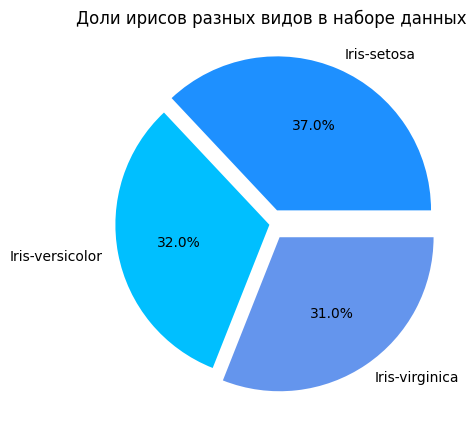

In [ ]:
# сформируем частотную таблицу видов ирисов (ряд)
freq_table = iris_df["class"].sample(100, random_state=42).value_counts()

# построим круговую диаграмму
plt.pie(
  freq_table,  # доли секторов (частоты видов ирисов)
  labels=freq_table.index,  # метки секторов
  colors=["dodgerblue", "deepskyblue", "cornflowerblue"],  # цвета секторов
  autopct="%.1f%%",  # формат метки (один дробный разряд и знак процента)
  explode=[0.1, 0.01, 0.1]  # расстояния секторов от центра круга (для их выделения)
)
plt.title("Доли ирисов разных видов в наборе данных");

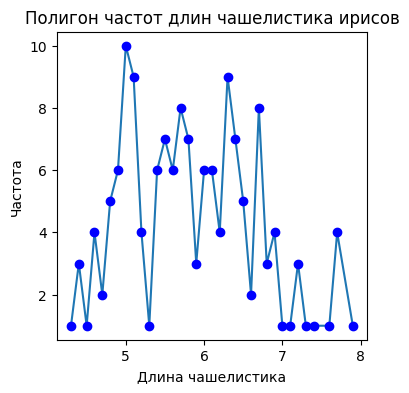

In [ ]:
# сохраним упорядоченную частотную таблицу в отдельную переменную (ряд)
freq_table = iris_df["sepal length"].value_counts().sort_index()
# построим линейный график (x - индексы, y - значения)
plt.plot(freq_table, zorder=1)  # положение на холсте - снизу
# добавим точки (диаграмму рассеяния), положение на холсте - сверху
plt.scatter(x=freq_table.index, y=freq_table, color="blue", zorder=2)

plt.xlabel("Длина чашелистика")  # подпись оси x
plt.ylabel("Частота")  # подпись оси y
plt.title("Полигон частот длин чашелистика ирисов");

In [ ]:
# данные о долях брендов смартфонов на российском рынке
smartphones_df = pd.DataFrame({
  'Realme': [8, 21, 20],
  'Honor': [4, 4, 19.4],
  'Xiaomi': [29, 24, 19],
  'Tecno': [0, 11, 17],
  'Samsung': [39, 24, 12],
  'Apple': [12, 10, 8],
  'ZTE': [6, 4.3, 1]
}, index=[2022, 2023, 2024])

# сумма по годам не равна 100%, недостающие проценты добавим в столбец "Прочие"
smartphones_df["Прочие"] = 100 - smartphones_df.apply(sum, axis=1)
smartphones_df

,Realme,Honor,Xiaomi,Tecno,Samsung,Apple,ZTE,Прочие
2022,8,4.0,29,0,39,12,6.0,2.0
2023,21,4.0,24,11,24,10,4.3,1.7
2024,20,19.4,19,17,12,8,1.0,3.6


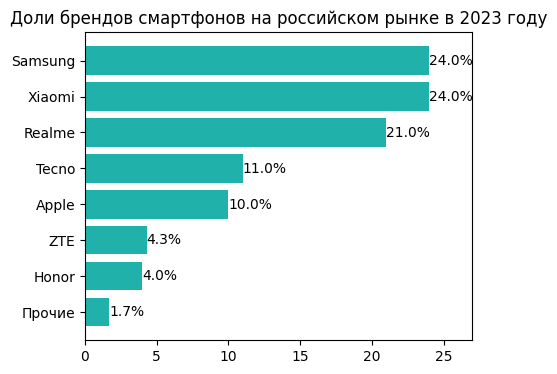

In [ ]:
plt.rcParams["figure.figsize"] = 5, 4  # изменим размеры холста

# возьмем данные 2023 года (ряд), упорядочим бренды по долям
top2023_df = smartphones_df.loc[2023].sort_values()

# горизонтальная столбчатая диаграмма, функция barh()
bar = plt.barh(
  y=top2023_df.index,  # значения по оси y (названия брендов)
  width=top2023_df,  # длины столбцов (доли)
  height=0.8,  # ширина (толщина) столбца
  color="lightseagreen"  # цвет - оттенок зеленого
)

# добавим рядом со столбцами их метки (доли) в отформатированном виде
plt.bar_label(bar, labels=top2023_df.apply(lambda s: f"{s:.1f}%"))
# если не расширить область построения, метки в нее не войдут
plt.xlim(0, top2023_df.max() + 3)
plt.title("Доли брендов смартфонов на российском рынке в 2023 году");

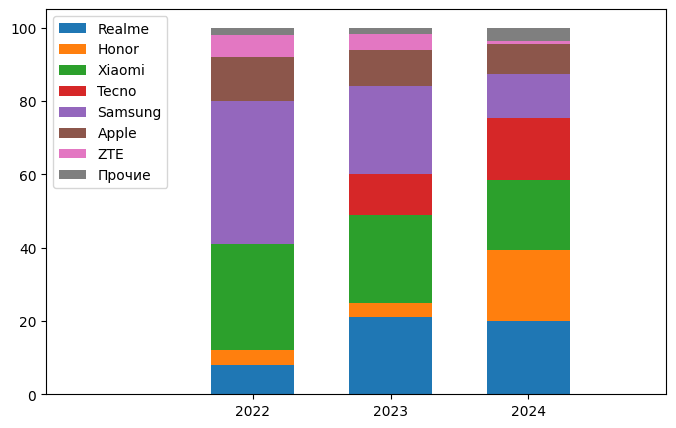

In [ ]:
plt.rcParams["figure.figsize"] = 8, 5  # изменим размеры холста

# поместим на диаграмму данные первого бренда
plt.bar(
  x=smartphones_df.index,  # значения по оси x (годы)
  height=smartphones_df.iloc[:, 0],  # высоты столбцов (доли первого бренда)
  width=0.6,  # ширина столбца
  label=smartphones_df.columns[0]  # метка диаграммы (название бренда)
)

# в цикле поместим на диаграмму данные остальных брендов,
# "приподнимая" столбцы очередного бренда
for i in range(1, len(smartphones_df.columns)):  # начнем со второго
  plt.bar(
    x=smartphones_df.index,  # значения по оси x (годы)
    height=smartphones_df.iloc[:, i],  # высоты столбцов (доли i-го бренда)
    width=0.6,  # ширина столбца
    # высоты, на которых расположены основания столбцов
    # (равны накопленным высотам столбцов предыдущих брендов)
    bottom=smartphones_df.iloc[:, :i].sum(axis=1),
    label=smartphones_df.columns[i]  # метка диаграммы (название бренда)
  )

plt.xticks(smartphones_df.index)  # метки на оси x (годы)
# расширим область построения, чтобы оставить место для легенды
plt.xlim(2020.5, 2025)
plt.gca().legend();  # отобразим легенду

## Аномалия

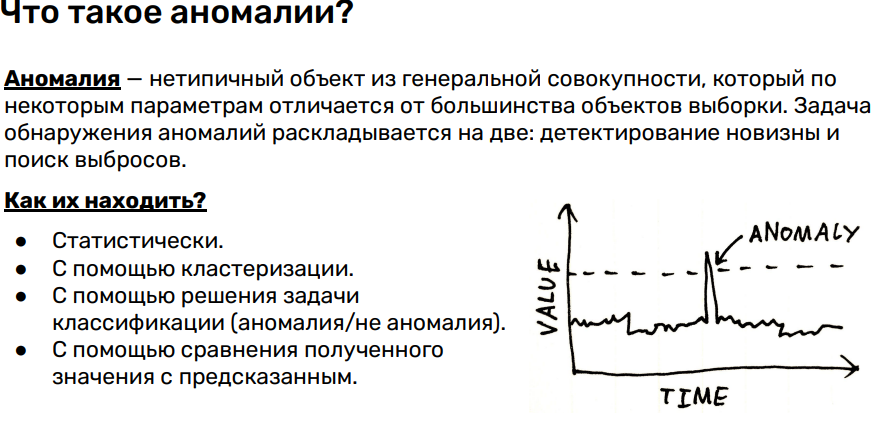

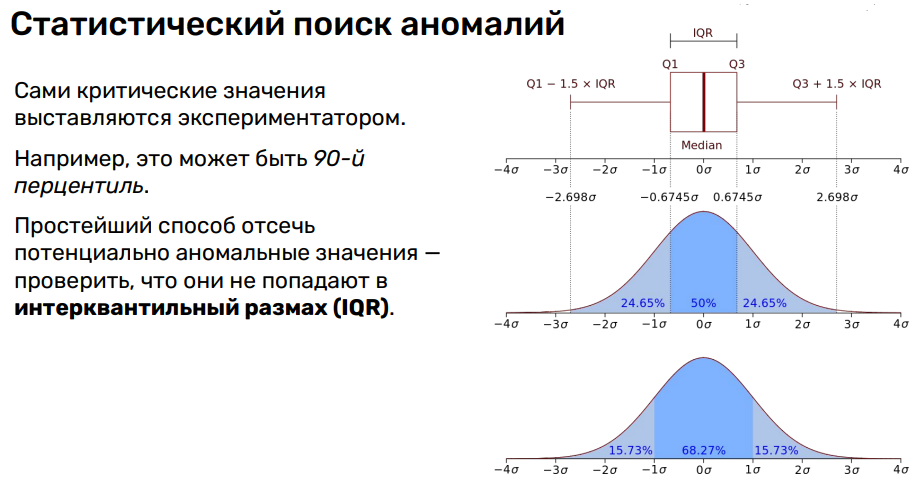


Box plot — это классический инструмент для быстрой оценки распределения. Он показывает:

Медиану (оранжевая линия внутри коробки) — середину данных.
Интерквартильный размах (IQR) — коробка от 25% до 75% квантилей.
«Усы» — границы, за пределы которых попадают выбросы.
Выбросы — точки за пределами «усов» (в виде кружков).



✅ Плюсы:

Простота: легко читается, даже не зная статистики.
Хорошо показывает центральную тенденцию и разброс.
Идеален для сравнения нескольких групп (например, x1 vs x2).



❌ Минусы:

*   Не показывает форму распределения (симметричное? бимодальное?).
*   Может скрывать важные детали — например, если в данных есть два пика.


🔹 *Violin Plot — «скрипка»: красота + глубина*
Violin plot — это расширение box plot, где к нему добавляется оценка плотности распределения (kernel density estimation). Это как будто наложили гистограмму на бок.

Он показывает:

Все то же, что и box plot (медиана, IQR, усы),
Плюс — форму распределения: где данные сконцентрированы, где редки, есть ли пики или хвосты.


✅ Плюсы:



*   Показывает форму распределения — например, в x3 видно, что распределениесимметричное, а в x1 — слегка смещено.
*   Отлично подходит для визуального анализа формы — особенно когда нужно понять, почему медианы совпадают, а данные разные.


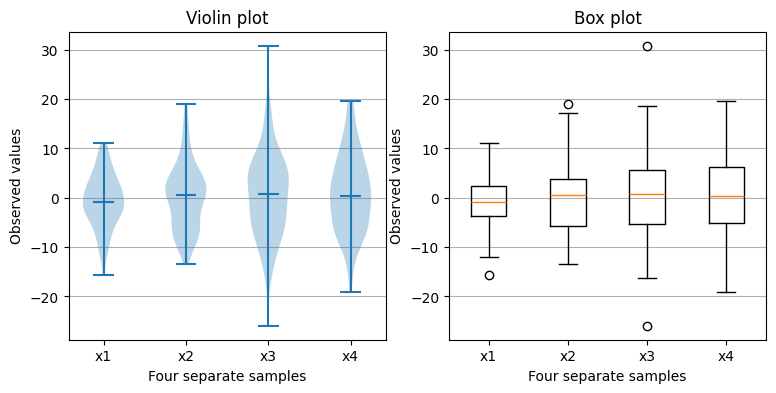

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

# Fixing random state for reproducibility
np.random.seed(42)


# generate some random test data
all_data = [np.random.normal(0, std, 100) for std in range(6, 10)]

# plot violin plot
axs[0].violinplot(all_data,
                  showmeans=False,
                  showmedians=True)
axs[0].set_title('Violin plot')

# plot box plot
axs[1].boxplot(all_data)
axs[1].set_title('Box plot')

# adding horizontal grid lines
for ax in axs:
    ax.yaxis.grid(True)
    ax.set_xticks([y + 1 for y in range(len(all_data))],
                  labels=['x1', 'x2', 'x3', 'x4'])
    ax.set_xlabel('Four separate samples')
    ax.set_ylabel('Observed values')

plt.show();

построим стандартную версию  box plot в цвете и рассмотрим:

🔹 *Notched Box Plot — «с выемкой»*: статистическая глубина.

Это расширенная версия box plot, где в коробке добавлена выемка (notch) вокруг медианы. Эта выемка — это 95%-ный доверительный интервал для медианы.

Он показывает:

Все то же, что и обычный box plot,
Плюс — доверительный интервал медианы (выемка).


✅ Плюсы:

*   Позволяет визуально оценить статистическую значимость различий между медианами.
*   Если выемки двух коробок не пересекаются, это указывает на то, что медианы статистически значимо различаются (с уровнем доверия ~95%).

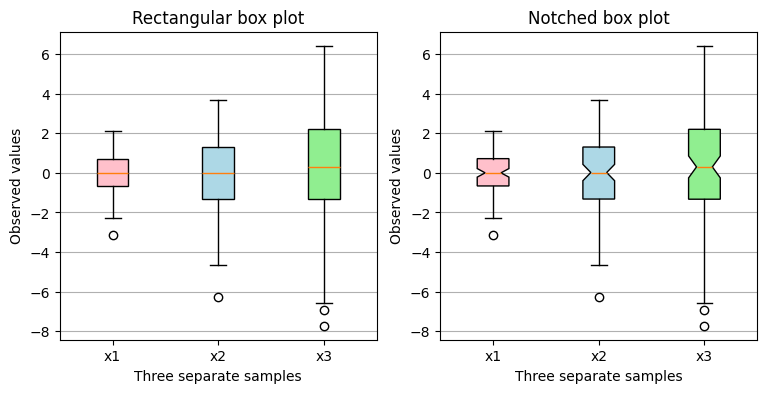

In [ ]:
# Random test data
np.random.seed(42)
all_data = [np.random.normal(0, std, size=100) for std in range(1, 4)]
labels = ['x1', 'x2', 'x3']

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

# rectangular box plot
bplot1 = ax1.boxplot(all_data,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     tick_labels=labels)  # will be used to label x-ticks
ax1.set_title('Rectangular box plot');

# notch shape box plot
bplot2 = ax2.boxplot(all_data,
                     notch=True,  # notch shape
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     tick_labels=labels)  # will be used to label x-ticks
ax2.set_title('Notched box plot');

# fill with colors
colors = ['pink', 'lightblue', 'lightgreen']
for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# adding horizontal grid lines
for ax in [ax1, ax2]:
    ax.yaxis.grid(True)
    ax.set_xlabel('Three separate samples')
    ax.set_ylabel('Observed values')

plt.show();

## Групповые гистограммы
Цель -  выявить скрытые закономерности, сравнить группы и принять обоснованные решения на основе данных.
Гистограммы позволяют ответить на ключевые вопросы:

Где центр данных?

Каков разброс?

Есть ли выбросы?

Форма распределения нормальная или нет?

Чем отличаются две группы, если их медианы одинаковы?




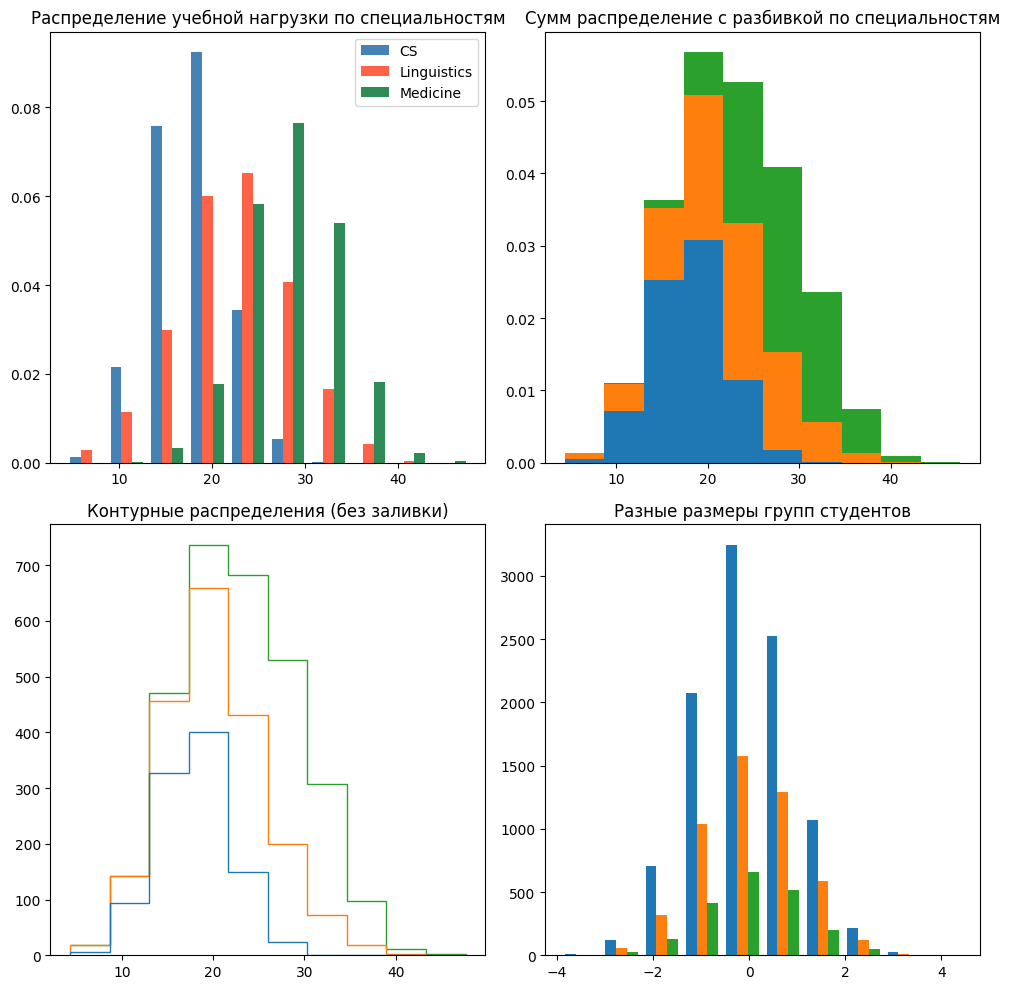

In [ ]:
np.random.seed(42)

plt.rcParams["figure.figsize"] = 10, 10

n_bins = 10
# Генерация данных: измеряем часы в неделю, которые они тратят на самоподготовку
# Технари: много практики, но и автоматизация → умеренное время, низкая дисперсия
cs_hours = np.random.normal(loc=18, scale=4, size=1000)  # среднее 18 ч, std=4

# Гуманитарии: много чтения, но гибкий график → выше среднее, выше дисперсия
ling_hours = np.random.normal(loc=22, scale=6, size=1000)

# Медики: очень много учёбы → высокое среднее, умеренная дисперсия
med_hours = np.random.normal(loc=28, scale=5, size=1000)

# Объединим в массив (1000×3)
x = np.column_stack([cs_hours, ling_hours, med_hours])

# Обрежем отрицательные значения (нельзя учиться -2 часа)
x = np.clip(x, 0, None)

fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2)

colors = ['steelblue', 'tomato', 'seagreen']
ax0.hist(x, n_bins, density=True, histtype='bar', color=colors, label=['CS', 'Linguistics', 'Medicine'])
ax0.legend(prop={'size': 10})
ax0.set_title('Распределение учебной нагрузки по специальностям')

ax1.hist(x, n_bins, density=True, histtype='bar', stacked=True)
ax1.set_title('Сумм распределение с разбивкой по специальностям')

ax2.hist(x, n_bins, histtype='step', stacked=True, fill=False)
ax2.set_title('Контурные распределения (без заливки)')

# Make a multiple-histogram of data-sets with different length.
x_multi = [np.random.randn(n) for n in [10000, 5000, 2000]]
ax3.hist(x_multi, n_bins, histtype='bar', label=['CS', 'Linguistics', 'Medicine'])
ax3.set_title('Разные размеры групп студентов')

fig.tight_layout()
plt.show()

## Планки погрешностей


Планка погрешности — это графическое представление интервала неопределенности вокруг точки данных. Она может обозначать:

Стандартное отклонение (SD) — меру разброса данных вокруг среднего.

Стандартную ошибку среднего (SEM) — меру того, насколько точно выборочное среднее оценивает истинное среднее.

Доверительный интервал (CI) — интервал, в котором с заданной вероятностью (например, 95%) находится истинное значение параметра.




🎯
Оценка надежности данных
Планки позволяют быстро оценить, насколько стабильны данные. Короткие планки — низкая дисперсия, высокая надежность.

Длинные — высокая вариабельность, возможная нестабильность.
Сравнение групп или условий

Если планки двух точек не пересекаются, это может указывать на статистически значимое различие между ними. Хотя для строгого вывода нужно проводить тесты (t-test, ANOVA), визуально это мощный индикатор.


Выявление выбросов и аномалий
Точки с очень длинными планками могут указывать на высокую изменчивость в этой точке — возможно, здесь есть систематическая ошибка или особенность эксперимента.


Количественная оценка неопределенности
В науке важно не только сказать «значение равно X», но и «мы уверены в этом на Y%».

Планки погрешностей — это визуальная форма доверительного интервала, которая делает результаты прозрачными и воспроизводимыми.
Поддержка принятия решений
Инженеры, медики, экономисты — все используют графики с планками, чтобы принимать решения на основе не идеальных, а реальных данных, содержащих шум и ошибки.


Планки погрешностей учат вас:

Не доверять одной точке — всегда смотреть на разброс.
Оценивать качество данных — короткие планки = хорошие данные.
Сравнивать результаты критически — если планки пересекаются, различие может быть случайным.

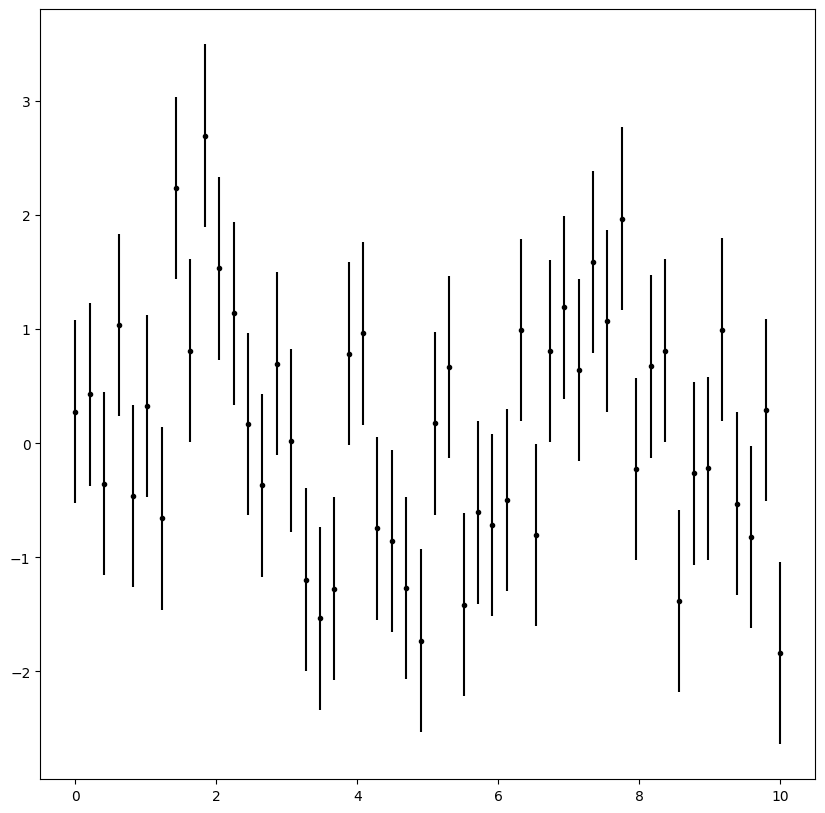

In [ ]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)
plt.errorbar(x, y, yerr=dy, fmt= '.k');

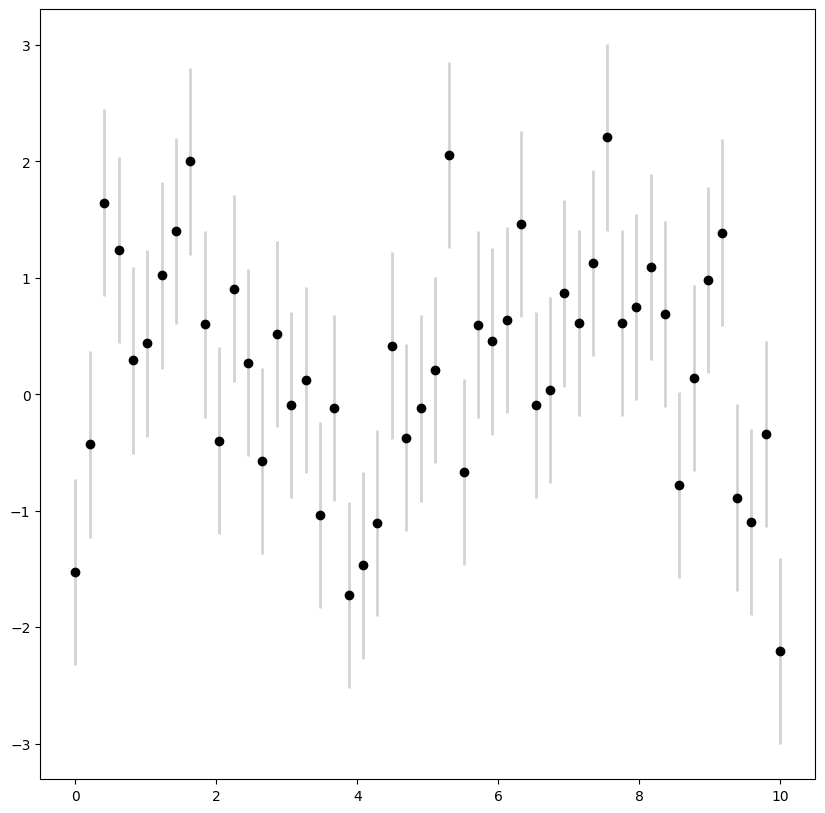

In [ ]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)
plt.errorbar(x, y, yerr=dy, fmt= 'o', color='black', ecolor='lightgray', elinewidth=2, capsize=0);

## Диаграмма рассеяния с индивидуально задаваемыми свойствами каждой точки

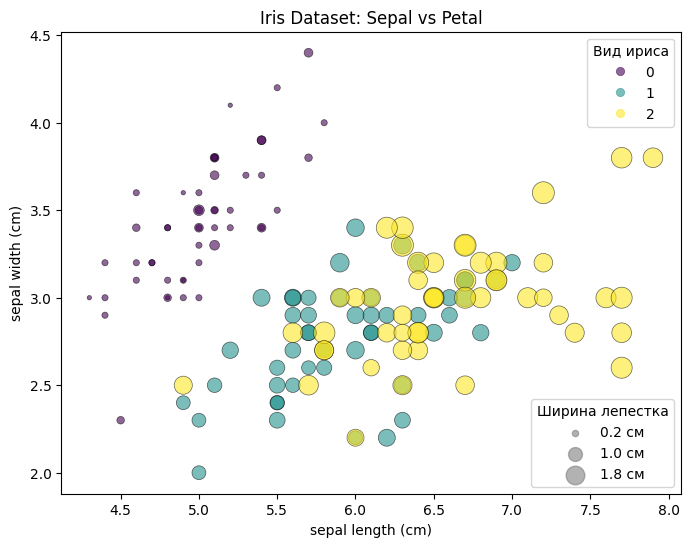

In [ ]:
from sklearn.datasets import load_iris #набор данных из библиотеки в этот раз:)
iris = load_iris()
features = iris.data.T

# Создаём фигуру и оси
fig, ax = plt.subplots(figsize=(8, 6))

scatter = ax.scatter(
    features[0],                    # sepal length
    features[1],                    # sepal width
    alpha=0.6,
    s=100 * features[3],           # размер ∝ petal width
    c=iris.target,
    cmap='viridis',
    edgecolor='k',
    linewidth=0.5
)

# Легенда 1: Цвета классов: 0 — Iris-setosa, 1 — Iris-versicolor, 2 — Iris-virginica
legend1 = ax.legend(
    *scatter.legend_elements(),
    title="Вид ириса",
    loc="upper right"
)
ax.add_artist(legend1)

# Легенда 2: Размер  ширина лепестка
petal_widths = np.array([0.2, 1.0, 1.8])
for pw in petal_widths:
    ax.scatter([], [], c='gray', alpha=0.6, s=100*pw, label=f'{pw} см')
legend2 = ax.legend(title="Ширина лепестка", loc="lower right")

ax.set_xlabel(iris.feature_names[0])
ax.set_ylabel(iris.feature_names[1])
ax.set_title("Iris Dataset")

plt.show()

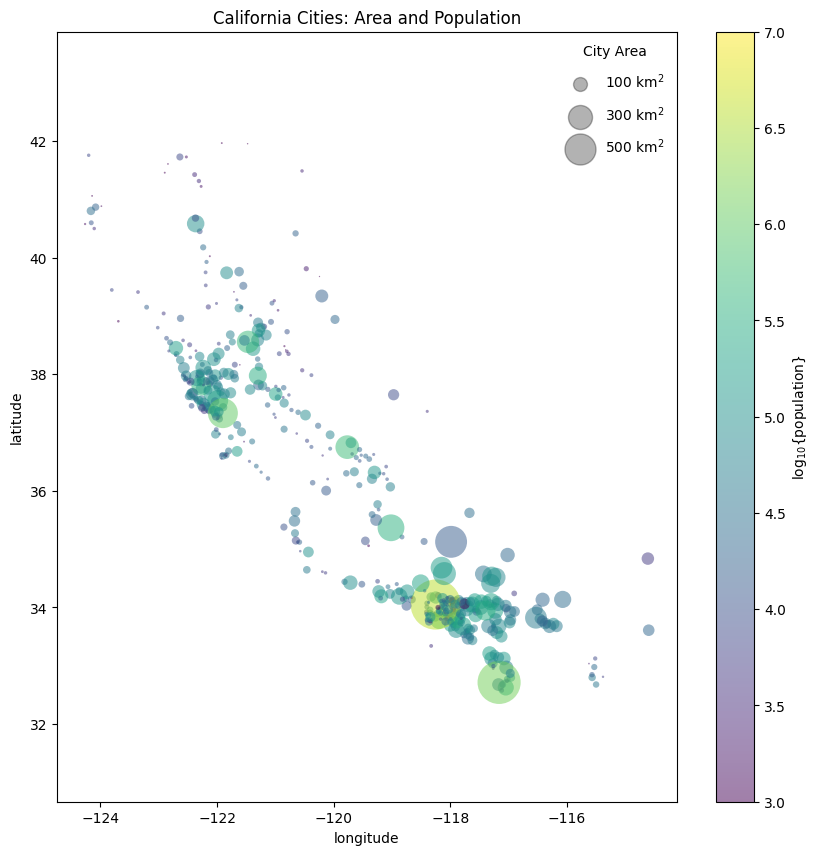

In [ ]:
import pandas as pd
cities = pd.read_csv('/content/california_cities.csv')

# Извлекаем интересующие нас данные
lat, lon = cities['latd'], cities['longd']
population, area = cities['population_total'], cities['area_total_km2']

# Распределяем точки по карте,
# задавая размеры и цвета, но без меток
plt.scatter(lon, lat, label=None,
            c=np.log10(population), cmap='viridis',
            s=area, linewidth=0, alpha=0.5)

plt.axis('equal')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}${population}')
plt.clim(3, 7)

# Создаем легенду:
# выводим на график пустые списки с нужным размером и меткой
for area in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.3, s=area,   # alpha=0.3 — делает точки в легенде полупрозрачными, чтобы не перебивать основной график.
                label=str(area) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1,
           title='City Area')

# Города Калифорнии: местоположение и численность населения
plt.title('California Cities: Area and Population');

*Почему легенда серая?*
Легенда, которая показывает соответствие размера точки и площади города, выполнена серыми кругами — это намеренный дизайн-выбор.

Причина:
Цвет в легенде для размера (площади) намеренно сделан серым, чтобы не путать её с цветовой шкалой населения.

В этом графике используется два разных параметра для кодирования данных:

Цвет → population (насыщенность/цвет = количество жителей)
Размер → area (диаметр точки = площадь города)
Если бы в легенде для размера использовались цветные точки, это создало бы визуальную путаницу: зритель мог бы подумать, что разные цвета в легенде означают разные значения площади, а на самом деле цвет здесь отвечает за население.

## Добавляем узнаваемого собственного стиля

In [ ]:
plt.style.available[:10] # первые 10

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot']



`plt.style.use('StyleName')` функция на весь остаток сеанса!

In [ ]:
# для демонстрации стилей создадим функцию
def hist_and_lines():
  np.random.seed(42)
  fig, ax =plt.subplots(1, 2, figsize=(11, 4))
  ax[0].hist(np.random.randn(1000))
  for i in range(3):
    ax[1].plot(np.random.rand(10))
  ax[1].legend(['a', 'b', 'c'], loc='lower left')
  plt.show()

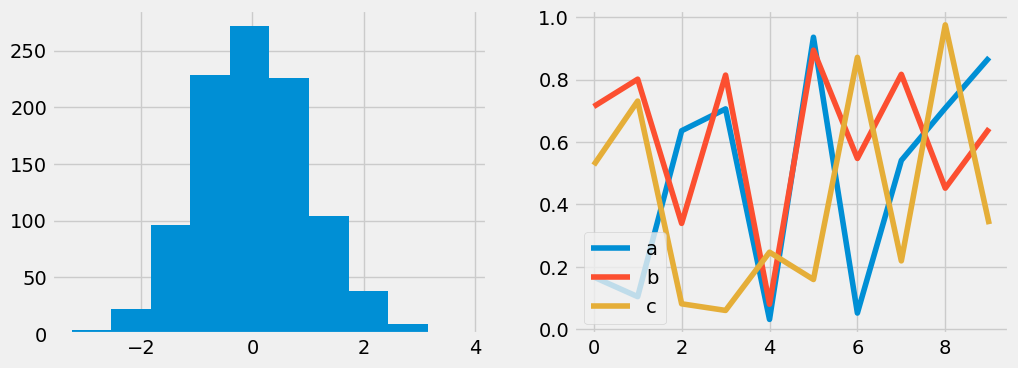

In [ ]:
with plt.style.context('fivethirtyeight'):
    hist_and_lines()

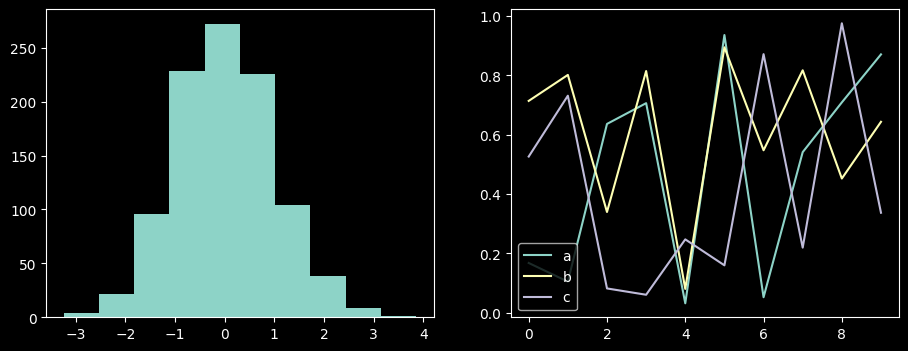

In [ ]:
with plt.style.context('dark_background'):
    hist_and_lines()

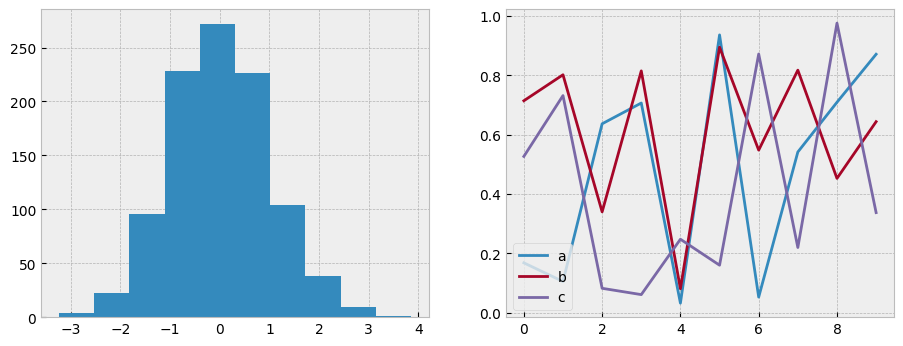

In [ ]:
with plt.style.context('bmh'):
    hist_and_lines()

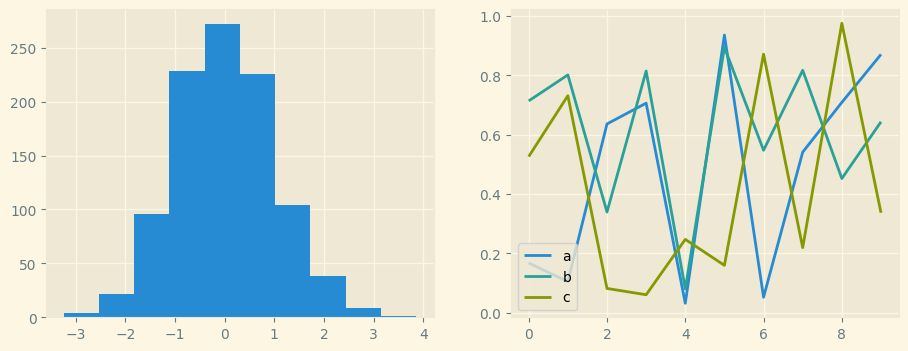

In [ ]:
with plt.style.context('Solarize_Light2'):
    hist_and_lines()

Рассмотреть следует многие стили и выбрать для себя `свой` для узнаваемости.